
#  Performing a goodness of fit test


##  Assignment 

The bar plot of `vendor_inco_term` suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a **chi-square goodness of fit test** to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

\(H_{0}\): The sample matches with the hypothesized distribution.

\(H_{A}\): The sample does not match with the hypothesized distribution. 

To decide which hypothesis to choose, we'll set a significance level of `0.1`.

`late_shipments`, `incoterm_counts`, and `hypothesized` from the last exercise are available. `chisquare` from `scipy.stats` has been loaded.

##  Pre exercise code 

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
late_shipments = pd.read_feather(
  path = "/usr/local/share/datasets/late_shipments.feather"
)
late_shipments['freight_cost_group'] = np.where(late_shipments['freight_cost_usd'] <= 5000, "reasonable", "expensive")
late_shipments = late_shipments[late_shipments['vendor_inco_term'] != "DDU"]

hypothesized = pd.DataFrame({
  'vendor_inco_term': ['EXW', 'CIP', 'DDP', 'FCA'], 
  'prop': [0.75, 0.05, 0.1, 0.1]}).sort_values('vendor_inco_term')

incoterm_counts = late_shipments['vendor_inco_term'].value_counts().rename_axis('vendor_inco_term').reset_index(name='n').sort_values('vendor_inco_term')

# From previous exercise
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()
plt.show()
```



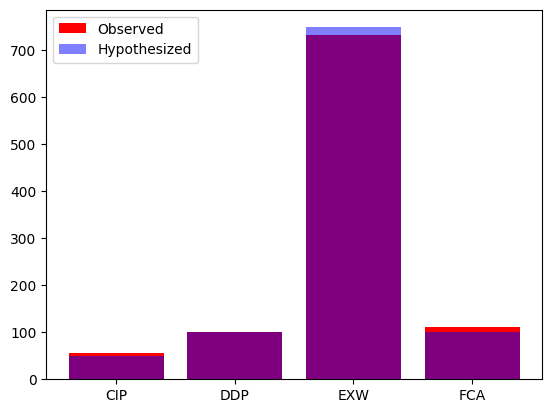

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
late_shipments = pd.read_feather(
  path = "late_shipments.feather"
)
late_shipments['freight_cost_group'] = np.where(late_shipments['freight_cost_usd'] <= 5000, "reasonable", "expensive")
late_shipments = late_shipments[late_shipments['vendor_inco_term'] != "DDU"]

hypothesized = pd.DataFrame({
  'vendor_inco_term': ['EXW', 'CIP', 'DDP', 'FCA'], 
  'prop': [0.75, 0.05, 0.1, 0.1]}).sort_values('vendor_inco_term')

incoterm_counts = late_shipments['vendor_inco_term'].value_counts().rename_axis('vendor_inco_term').reset_index(name='n').sort_values('vendor_inco_term')

# From previous exercise
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'], hypothesized['n'], alpha=0.5, color="blue", label="Hypothesized")
plt.legend()

##  Instructions 

- Using the `incoterm_counts` and `hypothesized` datasets, perform a chi-square goodness of fit test on the incoterm counts, `n`.


In [57]:
chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758687)